<a href="https://colab.research.google.com/github/Asadityasingh/DL-tutorial-yt/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
2+2

4

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
    def __init__(self, in_futures=4, h1=64, h2=128, h3=64, out_features=3):
      super().__init__()
      self.fc1 = nn.Linear(in_futures, h1)
      self.fc2 = nn.Linear(h1,h2)
      self.fc3 = nn.Linear(h2,h3)
      self.out = nn.Linear(h3, out_features)

    def forward(self,x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      x = self.out(x)
      return x

In [ ]:
torch.manual_seed(41)
model = Model()

In [ ]:
model

Model(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

<ipython-input-40-b5abc4b2dbd4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
x= my_df.drop('species', axis=1).values
y= my_df['species'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)



In [ ]:
#convert x feaature to float tensonrs
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
#convert y labels to tensoors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of the measure the error, how far off the predictions are from

criterion = nn.CrossEntropyLoss()
#choose Adam OPtimizer, lr = Learning rate (if error doesn't go down after a bunce of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [ ]:
# Epochs? (one run tru all the training data in our network)
epochs = 2000
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)

  #measure loss
  loss =criterion(y_pred,y_train)

  #keep track of loss
  losses.append(loss.detach().numpy())

#print every 10 epoch
  if i % 10 ==0:
    print(f'Epoch: {i} Loss: {loss} Acc: {1-loss}')
# Do some back propagation: take the error rate of forward propagation and feed it back
# thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.091688632965088 Acc: -0.09168863296508789
Epoch: 10 Loss: 0.33684566617012024 Acc: 0.6631543636322021
Epoch: 20 Loss: 0.08452603220939636 Acc: 0.9154739379882812
Epoch: 30 Loss: 0.07418642938137054 Acc: 0.9258135557174683
Epoch: 40 Loss: 0.07279911637306213 Acc: 0.9272009134292603
Epoch: 50 Loss: 0.06871972978115082 Acc: 0.931280255317688
Epoch: 60 Loss: 0.06480665504932404 Acc: 0.9351933598518372
Epoch: 70 Loss: 0.06245157867670059 Acc: 0.9375483989715576
Epoch: 80 Loss: 0.060606855899095535 Acc: 0.939393162727356
Epoch: 90 Loss: 0.05891360715031624 Acc: 0.9410864114761353
Epoch: 100 Loss: 0.057580623775720596 Acc: 0.9424193501472473
Epoch: 110 Loss: 0.05616941675543785 Acc: 0.9438306093215942
Epoch: 120 Loss: 0.054949961602687836 Acc: 0.945050060749054
Epoch: 130 Loss: 0.056375421583652496 Acc: 0.9436245560646057
Epoch: 140 Loss: 0.06004386767745018 Acc: 0.9399561285972595
Epoch: 150 Loss: 0.0617954321205616 Acc: 0.9382045865058899
Epoch: 160 Loss: 0.0611201375722885

Text(0.5, 0, 'Epoch')

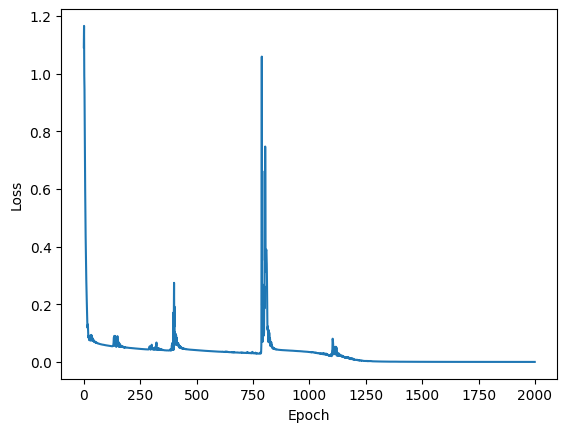

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

Evaluate Model on Test data set

In [ ]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [ ]:
loss

tensor(1.8278e-06)

In [ ]:
correct =0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] ==0:
      x='Setosa'
    elif y_test[i] ==1:
      x='Versicolor'
    else:
      x='Virginica'

    print(f'{i+1}.) {str(y_val)} \t {x}')


    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.) tensor([-15.8091,  18.1684, -25.5776]) 	 Versicolor
2.) tensor([  -6.9781,  -42.3886, -194.5597]) 	 Setosa
3.) tensor([-17.9777,  -7.3243,  12.7221]) 	 Virginica
4.) tensor([-13.5116,  13.5658, -19.7717]) 	 Versicolor
5.) tensor([-13.4759,  13.1914, -20.3952]) 	 Versicolor
6.) tensor([  -4.8710,  -39.7263, -173.4281]) 	 Setosa
7.) tensor([-25.0717,  35.2776, -52.4491]) 	 Versicolor
8.) tensor([-13.7924,  -5.0973,   9.0999]) 	 Virginica
9.) tensor([-12.2815,   7.1774,  -9.2573]) 	 Versicolor
10.) tensor([-18.4386,  27.7143, -41.5745]) 	 Versicolor
11.) tensor([-12.3208,  -4.2260,   7.5833]) 	 Virginica
12.) tensor([  -6.8011,  -34.1677, -165.6125]) 	 Setosa
13.) tensor([  -5.6108,  -44.1917, -193.0867]) 	 Setosa
14.) tensor([  -7.2744,  -34.2623, -168.7159]) 	 Setosa
15.) tensor([  -8.3220,  -40.4197, -194.3713]) 	 Setosa
16.) tensor([-16.9243,  20.4914, -29.9100]) 	 Versicolor
17.) tensor([-14.9462,  -6.0408,  10.6071]) 	 Virginica
18.) tensor([-16.2806,  23.8363, -35.3510]) 	 Vers

In [ ]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [ ]:
with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([  -7.0235,  -35.8853, -172.0931])
0


In [ ]:
#save model
torch.save(model.state_dict(), 'iris_model.pt')

In [ ]:
# use saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-55-7c1c09c835da>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [ ]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)